In [1]:
!pip3 install keras

In [2]:
!wget https://www.dropbox.com/s/df836enoah2mgpu/gender.tgz
!tar xvzf gender.tgz

--2018-02-23 12:43:55--  https://www.dropbox.com/s/df836enoah2mgpu/gender.tgz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/BsmtSZE5WPLuEDpO6rh0XUhMfPPMfyZ85bDXfEHXsyCkj971luDbNTlSmGCjMeYX/file [following]
--2018-02-23 12:43:55--  https://dl.dropboxusercontent.com/content_link/BsmtSZE5WPLuEDpO6rh0XUhMfPPMfyZ85bDXfEHXsyCkj971luDbNTlSmGCjMeYX/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.6.6, 2620:100:601c:6::a27d:606
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.6.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317692708 (303M) [application/x-gtar]
Saving to: ‘gender.tgz.2’

gender.tgz.2        100%[===================>] 302.97M  49.7MB/s    in 6.1s    

2018-02-23 12:44:02

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler, Callback
from keras.preprocessing.image import ImageDataGenerator
import math 

Using TensorFlow backend.


In [67]:
# Load 
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Stats
print(x_train.shape)
print(y_train.shape)
print(sum(y_train == 1))
print(sum(y_train == 0))
print("{:.4f}".format(sum(y_train == 1)/y_train.shape[0]))
print(x_test.shape)
print(y_test.shape)
print(sum(y_test == 1))
print(sum(y_test == 0))
print("{:.4f}".format(sum(y_test == 1)/y_test.shape[0]))

x_train = x_train[:,40:60,40:60,:]
x_test = x_test[:,40:60,40:60,:]

## Transforms
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


x_train /= 255
x_test /= 255



print(x_train.shape)
print(x_test.shape)


num_classes = 2

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(10586, 100, 100, 3)
(10586,)
2382
8204
0.2250
(2647, 100, 100, 3)
(2647,)
595
2052
0.2248
(10586, 20, 20, 3)
(2647, 20, 20, 3)


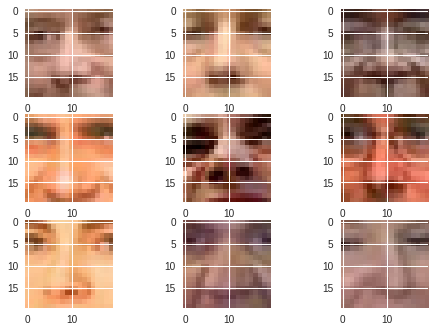

In [68]:
## View some images
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(x_train[i])

In [0]:
def setModel(num_classes,shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=shape))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
        
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(16))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))   
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [0]:
batch_size, epochs = 128, 50

In [0]:
# data augmentation
datagen = ImageDataGenerator(zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True,vertical_flip=False,
   featurewise_center=True,featurewise_std_normalization=True)
test_datagen = ImageDataGenerator(featurewise_center=True,
featurewise_std_normalization=True)
datagen.fit(x_train)
test_datagen.fit(x_train)

In [72]:
model = setModel(num_classes,x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 20, 20, 32)        896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 20, 20, 32)        128       
_________________________________________________________________
gaussian_noise_36 (GaussianN (None, 20, 20, 32)        0         
_________________________________________________________________
activation_43 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 20, 20, 32)        128       
_________________________________________________________________
gaussian_noise_37 (GaussianN (None, 20, 20, 32)        0         
__________

In [0]:

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.1
    epochs_drop = 17
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if epoch % epochs_drop == 0:
        print("New learning rate: ", lrate)
    return lrate
  
class TestCallback(Callback):
    def __init__(self, x_test, y_test, model,batch_size,datagen,save=False, filePath=''):
        self.x_test = x_test
        self.y_test = y_test
        self.err = []
        self.model = model
        self.best = 100
        self.save = save
        self.filePath = filePath
        self.batch_size = batch_size
        self.test_datagen = datagen

    def on_epoch_end(self, epoch, logs={}):
        score = self.model.evaluate_generator(self.test_datagen.flow(self.x_test, self.y_test,batch_size=self.batch_size), steps=100)
        error = 100 - score[1]*100
        print('\nTesting error: {} %\n'.format(error))
        self.err.append(error)
        if error < self.best and self.save:
            self.best = error
            self.model.save_weights(self.filePath)
            print("Best error, printing weigths")

    def printError(self,fileName):
        with open(fileName, 'w') as file:
            for i in self.err:
              file.write(str(i)+'\n')

In [0]:
lrate = LearningRateScheduler(step_decay)
error = TestCallback(x_test, y_test, model,batch_size,test_datagen, save=True, filePath='weights.hdf5')
callbacks_list = [lrate, error]

In [0]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
        steps_per_epoch=x_train.shape[0]//batch_size,epochs=epochs, callbacks=callbacks_list,verbose=1)

Epoch 1/50
New learning rate:  0.1
82/82 [==============================] - 4s 53ms/step - loss: 0.2317 - acc: 0.9064

Testing error: 8.681544825203545 %

Epoch 2/50
82/82 [==============================] - 5s 65ms/step - loss: 0.2368 - acc: 0.9039

Testing error: 7.6052548369111435 %

Epoch 3/50
82/82 [==============================] - 5s 62ms/step - loss: 0.2262 - acc: 0.9069

Testing error: 7.73187717820845 %

Epoch 4/50
82/82 [==============================] - 5s 62ms/step - loss: 0.2297 - acc: 0.9055

Testing error: 7.383665721244398 %

Epoch 5/50
 1/82 [..............................] - ETA: 2s - loss: 0.2820 - acc: 0.8984

82/82 [==============================] - 5s 61ms/step - loss: 0.2195 - acc: 0.9092

Testing error: 7.969294066725752 %

Epoch 6/50
82/82 [==============================] - 5s 62ms/step - loss: 0.2267 - acc: 0.9103

Testing error: 7.272871186760426 %

Epoch 7/50
82/82 [==============================] - 5s 60ms/step - loss: 0.2108 - acc: 0.9144

Testing error: 8.618233617761916 %

Epoch 8/50
82/82 [==============================] - 5s 60ms/step - loss: 0.2206 - acc: 0.9103

Testing error: 8.04051915304538 %

Epoch 9/50
26/82 [========>.....................] - ETA: 2s - loss: 0.2147 - acc: 0.9153

82/82 [==============================] - 5s 60ms/step - loss: 0.2197 - acc: 0.9111

Testing error: 6.8296929247660785 %

Best error, printing weigths
Epoch 10/50
82/82 [==============================] - 5s 63ms/step - loss: 0.2130 - acc: 0.9123

Testing error: 7.771446633920064 %

Epoch 11/50
82/82 [==============================] - 5s 60ms/step - loss: 0.2176 - acc: 0.9126

Testing error: 9.67869578367474 %

Epoch 12/50
82/82 [==============================] - 5s 59ms/step - loss: 0.2044 - acc: 0.9163

Testing error: 8.246280467559288 %

Epoch 13/50
18/82 [=====>........................] - ETA: 2s - loss: 0.2058 - acc: 0.9158

82/82 [==============================] - 5s 59ms/step - loss: 0.2046 - acc: 0.9177

Testing error: 7.676479931249773 %

Epoch 14/50
82/82 [==============================] - 5s 58ms/step - loss: 0.2096 - acc: 0.9165

Testing error: 9.393795514340724 %

Epoch 15/50
82/82 [==============================] - 5s 58ms/step - loss: 0.2101 - acc: 0.9167

Testing error: 8.000949684597714 %

Epoch 16/50
82/82 [==============================] - 5s 57ms/step - loss: 0.1974 - acc: 0.9196

Testing error: 7.993035795813924 %

Epoch 17/50
38/82 [============>.................] - ETA: 2s - loss: 0.2125 - acc: 0.9159

82/82 [==============================] - 5s 59ms/step - loss: 0.1989 - acc: 0.9197

Testing error: 6.631845550923529 %

Best error, printing weigths
Epoch 18/50
New learning rate:  0.010000000000000002
82/82 [==============================] - 5s 60ms/step - loss: 0.1874 - acc: 0.9264

Testing error: 7.209560009507896 %

Epoch 19/50
82/82 [==============================] - 5s 58ms/step - loss: 0.1813 - acc: 0.9264

Testing error: 7.075023743577219 %

Epoch 20/50
82/82 [==============================] - 5s 56ms/step - loss: 0.1860 - acc: 0.9238

Testing error: 7.241215576435735 %

Epoch 21/50
 7/82 [=>............................] - ETA: 2s - loss: 0.1741 - acc: 0.9297

82/82 [==============================] - 5s 57ms/step - loss: 0.1785 - acc: 0.9259

Testing error: 7.312440658038312 %

Epoch 22/50
82/82 [==============================] - 5s 56ms/step - loss: 0.1774 - acc: 0.9272

Testing error: 7.296612871980017 %

Epoch 23/50
15/82 [====>.........................] - ETA: 2s - loss: 0.1773 - acc: 0.9333

In [76]:
score = model.evaluate_generator(test_datagen.flow(x_test, y_test,
     batch_size=batch_size), steps=100)
print(100 - score[1]*100)

7.185818265325167


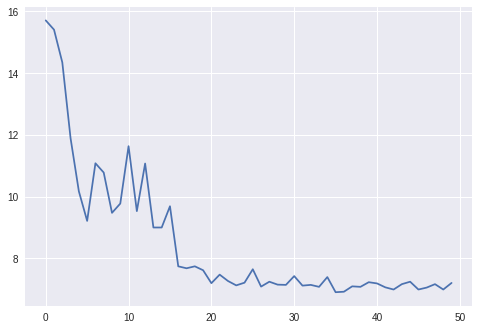

In [79]:
plt.plot(error.err)
plt.show()